In [1]:
import pandas as pd
import numpy as np
import random

from sklearn import datasets, linear_model


import matplotlib.pyplot as plt
#plt.style.use(r'C:\Users\William.Cox\.matplotlib\stylelib\test.mplstyle')
%matplotlib inline

In [2]:
def create_dataset(how_big, variance, step=2, correlation='positive'):
    val = 1
    ys = []
    
    for i in range(how_big):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        
        if correlation and correlation=='positive':
            val+=step
        elif correlation and correlation=='negative':
            val-=step
        
    xs = [i for i in range(len(ys))]
    
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)

In [3]:
create_dataset

<function __main__.create_dataset>

In [4]:
xs, ys = create_dataset(40, 5, 2, correlation="positive")

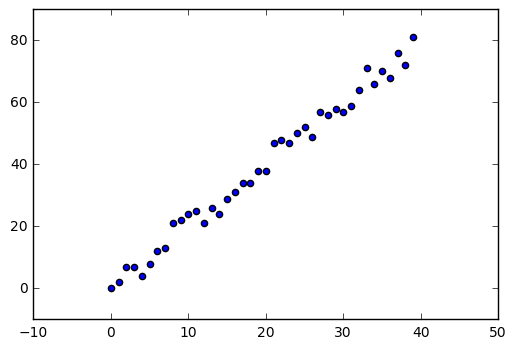

In [5]:
plt.scatter(xs, ys)

# Best Fit Line

## Least Squared Errors


In [6]:
def best_fit_slope_and_intercept(xs,ys):
    
    m = ( ( xs.mean() * ys.mean() )  - (xs*ys).mean() )  /  ( xs.mean()**2 - (xs**2).mean() )
    
    b = ys.mean() - (m * xs.mean())
    
    return m, b

In [7]:
m, b = best_fit_slope_and_intercept(xs,ys)
print "The slope of the regression line: ", m
print "The intercept of the regression line: ", b

The slope of the regression line:  1.98048780488
The intercept of the regression line:  0.580487804878


In [8]:
regression_line = [(m*x)+b for x in xs]

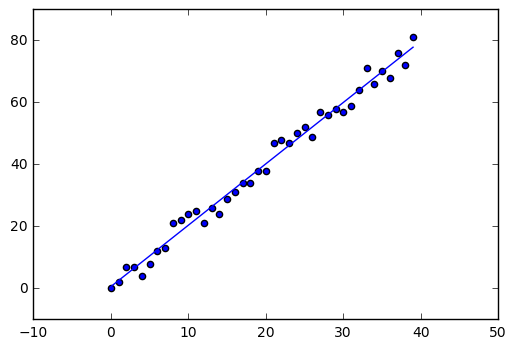

In [9]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)

# How Accurate is our Best Fit Line?

In [10]:
def squared_error(ys_original, ys_line):
    
    residuals = ys_original - ys_line
    
    residuals_squared = residuals**2
    
    squared_error = residuals_squared.sum()
    
    
    return squared_error

In [11]:
def coefficient_of_determination(ys_original,ys_line):
    #Returns the mean y for every x value
    y_mean_line = []

    for y in ys:
        y_mean_line.append(ys.mean())
    
    #Calculate & compare the squared error for the data against y-mean/regression line 
    squared_error_regr = squared_error(ys_original, ys_line)
    squared_error_mean = squared_error(ys_original,y_mean_line)
    
    r_squared = 1 - (squared_error_regr / squared_error_mean)
    
    return r_squared

In [12]:
r_squared = coefficient_of_determination(ys,regression_line)
print r_squared

0.986394012961
